Steane code pipecleaning
=====================

1. Set up logical zero for Steane code based on Preskill at http://theory.caltech.edu/~preskill/pubs/preskill-1998-reliable.pdf

2. Perform a logical Hadamard

3. Peform a logical CX to entangle the two logical qubits

4. Set up ancilla based on the book by Nielsen MA, Chuang IL. Quantum Computation and Quantum Information, 10th Anniversary Edition. Cambridge University Press; 2016. p. 474

5. Reverse the set up

**This is part of a "pipe-cleaning" exercise for an MSc Masters project.  The aim is to check that there are no issues with setting up the Steane code on Quiskit.  Please note that a full evaluation has not yet been carried out.  There may be some undetected errors.  Please use at your own risk**

Import the necessary function modules.

In [1]:
from qiskit import(
  QuantumCircuit,
  QuantumRegister,
  ClassicalRegister,
  execute,
  Aer)

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

Declare constants to control the process flow to be carried out

In [2]:
FIRST_LOGICAL_ONE = False        #Logical One on first qubit?
SECOND_LOGICAL_ONE = False       #Logical One on second qubit?

FIRST_LOGICAL_X = False          #Apply logical X operation? 
SECOND_LOGICAL_X = False         #Apply logical X operation? 

FIRST_REVERSE = True             #Reverse the first logical qubit
SECOND_REVERSE = True            #Reverse the first logical qubit

FIRST_HADAMARD = True            #Hadamard on first logical qbit
SECOND_HADAMARD = False          #Hadamard on second logical qbit

LOGICAL_CX = True                #Logical CX

ANCILLA_CHECKS = True            #Ancillas are active?
TESTING = False                  #Test by applying and X or Z error to one of the qubits

NOISE = True                     #Test with noise
SHOTS = 1000                     #Number of shots to run    
MEASURE_NOISE = 0.000001         #Measurement noise
GATE_NOISE = 0.01                #Gate noise

SIMULATOR = Aer.get_backend('qasm_simulator')

Initialise the ancilla and code bits, and the classical registers for measurement.

In [3]:
ca = QuantumRegister(6,'ancilla1') # initialize ancilla bits with six qubits in the 0 state
cb = QuantumRegister(7,'logical_1') # initialize code bits with seven qubits in the 0 state
cc = QuantumRegister(6,'ancilla2') # initialize ancilla bits with six qubits in the 0 state
cd = QuantumRegister(7,'logical_2') # initialize code bits with seven qubits in the 0 state
sa = ClassicalRegister(6,'measure_ancilla_1') # six measurement bit for the code   
sb = ClassicalRegister(7,'measure_code1') # seven measurement bit for the code    
sc = ClassicalRegister(6,'measure_ancilla_2') # six measurement bit for the code   
sd = ClassicalRegister(7,'measure_code3') # seven measurement bit for the code 

qc = QuantumCircuit(cb, ca, cc, cd , sb, sa, sc, sd)

Initialise logical_qubit2 to logical zero or logical one

In [4]:
#logical zero
#Set last qubit to 1 if this is a logical one.
if FIRST_LOGICAL_ONE:
    qc.x(cb[6])
    
#prepare the state a|0000000>+b|0000111>
qc.cx(cb[6],cb[4])
qc.cx(cb[6],cb[5])

# set first three qubits in superposition    
qc.h(cb[0])
qc.h(cb[1])
qc.h(cb[2])

#parity checks on first qubit
qc.cx(cb[0],cb[3])
qc.cx(cb[0],cb[5])
qc.cx(cb[0],cb[6])

#parity checks on second qubit
qc.cx(cb[1],cb[3])
qc.cx(cb[1],cb[4])
qc.cx(cb[1],cb[6])

#parity checks on third qubit
qc.cx(cb[2],cb[3])
qc.cx(cb[2],cb[4])
qc.cx(cb[2],cb[5])

qc.barrier(cb)

Initialise logical_qubit2 to logical zero or logical one

In [5]:
#logical zero
#Set last qubit to 1 if this is a logical one.
if SECOND_LOGICAL_ONE:
    qc.x(cd[6])
    
#prepare the state a|0000000>+b|0000111>
qc.cx(cd[6],cd[4])
qc.cx(cd[6],cd[5])

# set first three qubits in superposition    
qc.h(cd[0])
qc.h(cd[1])
qc.h(cd[2])

#parity checks on first qubit
qc.cx(cd[0],cd[3])
qc.cx(cd[0],cd[5])
qc.cx(cd[0],cd[6])

#parity checks on second qubit
qc.cx(cd[1],cd[3])
qc.cx(cd[1],cd[4])
qc.cx(cd[1],cd[6])

#parity checks on third qubit
qc.cx(cd[2],cd[3])
qc.cx(cd[2],cd[4])
qc.cx(cd[2],cd[5])

qc.barrier(cd)

We can test that an x or z error correctly updates the ancillas to show and error has occurred.

In [6]:
#testing - x z error in first qubit
if TESTING:
    qc.x(cb[2])
    qc.z(cb[2])
    qc.x(cd[2])
    qc.z(cd[2])

If requested apply a logical X to either logical qubit

In [7]:
#apply logical x gate
if FIRST_LOGICAL_X:
    for index in range (7):
        qc.x(cb[index])
    qc.barrier(cb)
        
#apply logical x gate
if SECOND_LOGICAL_X:
    for index in range (7):
        qc.x(cd[index])
    qc.barrier(cd)

If requested apply a logical H

In [8]:
if FIRST_HADAMARD:
    for index in range (7):
        qc.h(cb[index])
    qc.barrier()
        
if SECOND_HADAMARD:
    for index in range (7):
        qc.h(cd[index])
    qc.barrier()

In [9]:
if LOGICAL_CX:
    for index in range (7):
        qc.cx(cb[index],cd[index])
    qc.barrier()

Set up ancilla checks

In [10]:
if ANCILLA_CHECKS:
    # Hadamard each ancilla bit
    for index in range (6):
        qc.h(ca[index])
        
    qc.cx(ca[0],cb[0])
    qc.cx(ca[0],cb[3])
    qc.cx(ca[0],cb[5])
    qc.cx(ca[0],cb[6])
    
    qc.cx(ca[1],cb[1])
    qc.cx(ca[1],cb[3])
    qc.cx(ca[1],cb[4])
    qc.cx(ca[1],cb[6])    
    
    qc.cx(ca[2],cb[2])
    qc.cx(ca[2],cb[3])
    qc.cx(ca[2],cb[4])
    qc.cx(ca[2],cb[5])   
    
    qc.cz(ca[3],cb[0])
    qc.cz(ca[3],cb[2])
    qc.cz(ca[3],cb[4])
    qc.cz(ca[3],cb[6])
    
    qc.cz(ca[4],cb[1])
    qc.cz(ca[4],cb[2])
    qc.cz(ca[4],cb[5])
    qc.cz(ca[4],cb[6])
    
    qc.cz(ca[5],cb[0])
    qc.cz(ca[5],cb[1])
    qc.cz(ca[5],cb[2])
    qc.cz(ca[5],cb[3])
    
    for index in range (6):
        qc.h(ca[index])
        
    for index in range (6):
        qc.h(cc[index])
        
    qc.cx(cc[0],cd[0])
    qc.cx(cc[0],cd[3])
    qc.cx(cc[0],cd[5])
    qc.cx(cc[0],cd[6])

    qc.cx(cc[1],cd[1])
    qc.cx(cc[1],cd[3])
    qc.cx(cc[1],cd[4])
    qc.cx(cc[1],cd[6])    

    qc.cx(cc[2],cd[2])
    qc.cx(cc[2],cd[3])
    qc.cx(cc[2],cd[4])
    qc.cx(cc[2],cd[5])   
    
    qc.cz(cc[3],cd[0])
    qc.cz(cc[3],cd[2])
    qc.cz(cc[3],cd[4])
    qc.cz(cc[3],cd[6])
    
    qc.cz(cc[4],cd[1])
    qc.cz(cc[4],cd[2])
    qc.cz(cc[4],cd[5])
    qc.cz(cc[4],cd[6])
    
    qc.cz(cc[5],cd[0])
    qc.cz(cc[5],cd[1])
    qc.cz(cc[5],cd[2])
    qc.cz(cc[5],cd[3])
    
    for index in range (6):
        qc.h(cc[index])
        
    qc.barrier()

If required the encoding circuit is run in reverse to get back to the original input.

In [11]:
if FIRST_REVERSE:
    qc.cx(cb[2],cb[5])
    qc.cx(cb[2],cb[4])
    qc.cx(cb[2],cb[3])
    qc.cx(cb[1],cb[6])
    qc.cx(cb[1],cb[4])
    qc.cx(cb[1],cb[3])
    qc.cx(cb[0],cb[6])
    qc.cx(cb[0],cb[5])
    qc.cx(cb[0],cb[3])
    qc.h(cb[2])
    qc.h(cb[1])
    qc.h(cb[0])
    qc.cx(cb[6],cb[5])
    qc.cx(cb[6],cb[4])

In [12]:
if SECOND_REVERSE:   
    qc.cx(cd[2],cd[5])
    qc.cx(cd[2],cd[4])
    qc.cx(cd[2],cd[3])
    qc.cx(cd[1],cd[6])
    qc.cx(cd[1],cd[4])
    qc.cx(cd[1],cd[3])
    qc.cx(cd[0],cd[6])
    qc.cx(cd[0],cd[5])
    qc.cx(cd[0],cd[3])
    qc.h(cd[2])
    qc.h(cd[1])
    qc.h(cd[0])
    qc.cx(cd[6],cd[5])
    qc.cx(cd[6],cd[4])

Define noise model in case needed:

In [13]:
def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)
    error_gate3 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["h"])  # single qubit gate error is applied to h gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
    noise_model.add_all_qubit_quantum_error(error_gate3, ["cz"]) # same two qubit gate error is applied to cz gates
        
    return noise_model

Get noise model if needed:

In [14]:
if NOISE:
    noise_model = get_noise(MEASURE_NOISE,GATE_NOISE)

The circuit executed

In [15]:
# run the circuit with the noise model and extract the counts

qc.barrier()

qc.measure(range(26), range(26))

#qc.measure([0,1,2,3,4,5,6], [0,1,2,3,4,5,6])
#qc.measure([7,8,9,10,11,12], [7,8,9,10,11,12])
#qc.measure([13,14,15,16,17,18,19], [13,14,15,16,17,18,19])
#qc.measure([20,21,22,23,24,25], [20,21,22,23,24,25])

#Measurement noise
if NOISE:
    result = execute(qc, SIMULATOR, noise_model=noise_model, shots=SHOTS).result()
else:
    result = execute(qc, SIMULATOR, shots=SHOTS).result()

Finally we print out the results.

In [16]:
counts = result.get_counts(qc)
print ('The different states can be counted.  The simulated result are', counts)

The different states can be counted.  The simulated result are {'0000000 000000 000000 0000000': 91, '0000000 000000 000000 0000001': 11, '0000000 000000 000000 0010000': 2, '0000000 000000 000010 0000000': 3, '0000000 000000 100000 0000000': 2, '0000000 001000 000000 0000000': 3, '0000010 000000 000000 0000000': 3, '0100000 000000 000000 0000000': 2, '0100000 000000 000000 0000001': 1, '0000010 000000 000000 0000010': 1, '0000010 000000 000000 0011000': 1, '0000010 000000 000000 1010000': 1, '0000010 000000 000010 0000010': 1, '0000000 001000 000000 0110001': 1, '0000000 000000 100000 0001101': 1, '0000000 000000 100000 0001111': 1, '0000010 000000 100000 0100000': 1, '0000000 000000 100000 0010010': 1, '0100000 010000 000000 0000000': 4, '0100000 010000 000000 0000011': 1, '0100000 010000 010000 0001000': 1, '0100000 010000 010000 0100000': 1, '0100000 010000 010100 0100010': 1, '0100000 010000 010101 0100101': 1, '0100000 010000 100000 1000000': 1, '0100000 010000 110000 0101000': 1

Results are above. The circuit is below

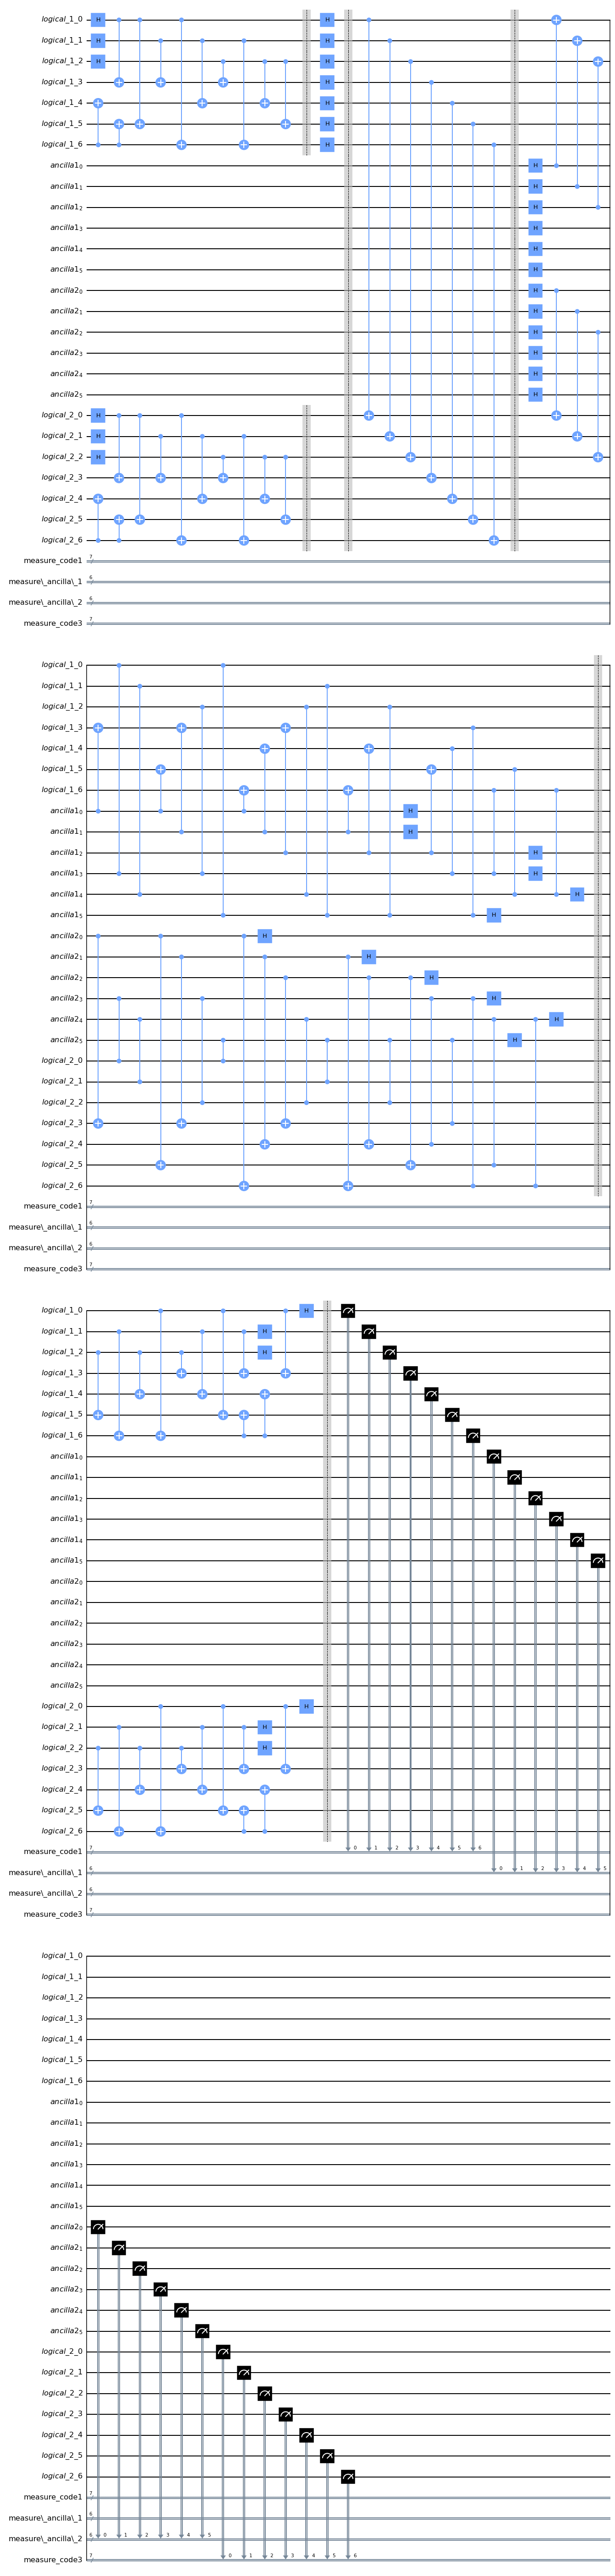

In [17]:
qc.draw(output='mpl', filename = 'two_qubits.jpg')
#qc.draw(output='text')